# CALCOFI Ocean Data

The CalCOFI data set represents the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data in the world

- data source: https://calcofi.org/data/oceanographic-data/bottle-database/

- kaggle: https://www.kaggle.com/datasets/sohier/calcofi
- code source: https://github.com/adurukan/Regression-with-Keras-on-CalCOFI-data/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

## Load the data

In [39]:
bottle = pd.read_csv('bottle.csv')
bottle.shape

(34554, 74)

In [45]:
# restrict to only 4 columns
# Potential Density (Sigma Theta), kilograms per cubic meter
bottle = bottle[['Depthm','Salnty','STheta', 'T_degC']]
bottle.columns = ['Depth','Salnty','STheta', 'Temp']
bottle.head()

,Depth,Salnty,STheta,Temp
0,0,33.440,25.649,10.50
1,8,33.440,25.656,10.46
2,10,33.437,25.654,10.46
3,19,33.420,25.643,10.45
4,20,33.421,25.643,10.45


In [47]:
bottle.shape

(34554, 4)

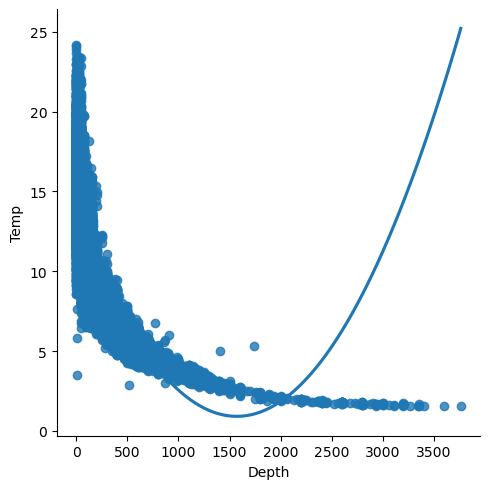

In [52]:
# visualize prectors vs target
sns.lmplot(x="Depth", y="Temp", data=bottle,
           order=2, ci=None)

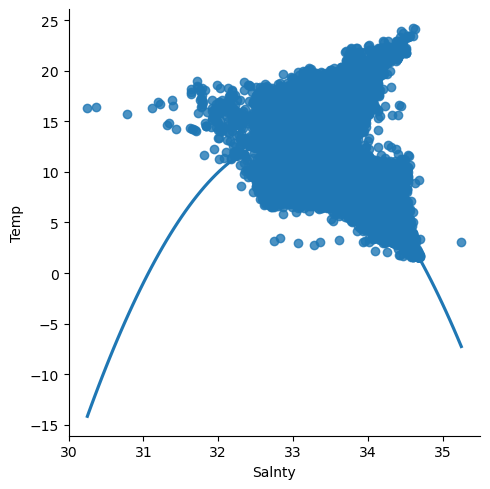

In [53]:
sns.lmplot(x="Salnty", y="Temp", data=bottle,
           order=2, ci=None)

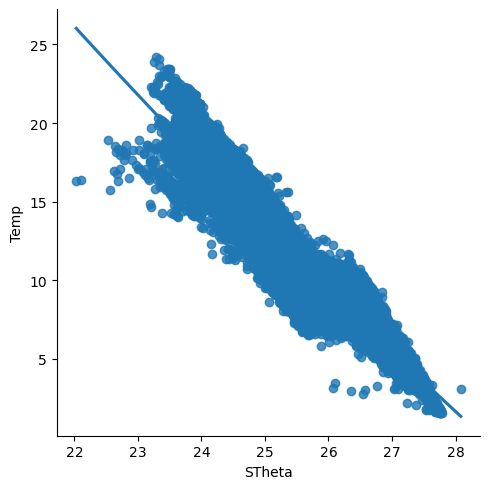

In [54]:
sns.lmplot(x="STheta", y="Temp", data=bottle,
           order=2, ci=None)

In [46]:
# missing values
bottle.isnull().sum().sort_values(ascending=False).head(40)

STheta    1121
Salnty     937
Temp       227
Depth        0
dtype: int64

In [49]:
# drop rows with missing data
bottle.dropna(inplace=True)
bottle.shape

(33433, 4)

In [50]:
# predictors and target
X = bottle.drop(['Temp'], axis=1)
y = bottle['Temp']

In [51]:
# standardization
x_norm = (X - X.mean()) / X.std()
x_norm.head()

,Depth,Salnty,STheta
0,-0.936936,-0.729360,-0.419626
1,-0.916490,-0.729360,-0.413210
2,-0.911379,-0.734878,-0.415043
3,-0.888377,-0.766147,-0.425125
4,-0.885821,-0.764308,-0.425125


In [100]:
# standardized data has mean=0, std=1
print(x_norm.mean())
print(x_norm.std())

Depth     2.369680e-17
Salnty   -1.370844e-14
STheta    2.416011e-15
dtype: float64
Depth     1.0
Salnty    1.0
STheta    1.0
dtype: float64


In [55]:
# for later use
n_cols = x_norm.shape[1]
n_cols

3

## Train test split

In [72]:
# split into 67% for train and 33% for test

X_train, X_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.33, random_state=42)

## Create the Regression NN Model

In [73]:
model = Sequential()

In [74]:
model.add(Dense(50, activation='relu', 
                input_shape=(n_cols,))
         )

In [75]:
model.add(Dense(50, activation='relu'))

In [76]:
model.add(Dense(1))

In [79]:
# compile model
model.compile(optimizer='adam', 
              loss='mean_squared_error'
             )

In [80]:
# Using 30% as valuidation data and 5 epochs, lets fit the model
model.fit(X_train, y_train, 
          validation_split=0.3, 
          epochs=5, 
          verbose=2)

Epoch 1/5
490/490 - 1s - loss: 10.4880 - val_loss: 0.3294
Epoch 2/5
490/490 - 0s - loss: 0.2666 - val_loss: 0.1942
Epoch 3/5
490/490 - 0s - loss: 0.1478 - val_loss: 0.0953
Epoch 4/5
490/490 - 0s - loss: 0.0651 - val_loss: 0.0374
Epoch 5/5
490/490 - 0s - loss: 0.0240 - val_loss: 0.0149


## Make predictions

In [82]:
# Make predictions on the testing dataset
y_preds = model.predict(X_test)

In [98]:
# How do the first five predictions compare to the first five actual values?
true_5=y[:5].tolist()
pred_5=[round(x[0],2) for x in y_preds[:5]]
print('first 5 true values:', true_5)
print('first 5 predicted values:', pred_5)

first 5 true values: [10.5, 10.46, 10.46, 10.45, 10.45]
first 5 predicted values: [6.13, 2.63, 10.48, 8.3, 4.19]


In [89]:
# root mean squared error represents the average errorof our model
from sklearn import metrics
rmse_ols = np.sqrt(metrics.mean_squared_error(y_test, y_preds))
rmse_ols

0.11860913731207791

In [90]:
# R-squared is the proportion of the variance in the DV that's explained by the model
r2_ols=metrics.r2_score(y_test, y_preds)
r2_ols

0.9993253578491057